# Condensación Bosónica no convencional de Bose-Einstein

### **Tabla de contenidos**
      
1. [Problema](#Problema)
    1. [Formula](#Formula)
    2. [Parametros](#Parametros)
    3. [Condiciones](#Condiciones)
2. [Codificación modulos](#Codificación modulos)
    1. [Modulos base](#Modulos base)
        1. [Dependencias](#Dependencias)
        2. [Obtención de *ρ*](#Obtención de *ρ*)
        3. [Obtención validador](#Obtención validador)
        4. [Generador vector N's](#Generador vector N's)
        5. [Graficador](#Graficador)
    2. [Modulos experimentacion](#Modulos experimentacion)
        1. [metodo 1: Calculo real vs esperado](#ME_metodo1)
		2. [metodo 2: Calculo real vs vector esperado, con vector V y N variables](#ME_metodo2)
		3. [metodo 3: Calculo vector real vs vector esperado, con valores constantes y un vector variable](#ME_metodo3)
            1. [beta variable](#ME_metodo3_beta)
			2. [mu variable](#ME_metodo3_mu)
			3. [lambda variable](#ME_metodo3_lambda)
			4. [gamma variable](#ME_metodo3_gamma)
3. [Experimentos](#*Experimentos*)
    1. [Cargar modulos proyecto](#Cargar modulos proyecto)
    2. [Seccion 1: Vector N variable, con su respectivo Vector V y los demás valores fijos](#E_seccion1)
    3. [Seccion 2: Prueba condicion de borde, N o V variable y los demás valores fijos](#E_seccion2)
    4. [Seccion 3: Datos fijos y uno variable (vector)](#E_seccion3)
        1. [subseccion : Prueba β]()
        2. [subseccion : Prueba µ]()
        3. [subseccion : Prueba λ]()
        4. [subseccion : Prueba γ]()
    5. [Seccion 4: Graficos 3D de validador, con un dato fijo, los demás variables](#E_seccion4)
        1. [subseccion : Prueba ρ]()
        2. [subseccion : Prueba µ]()
        3. [subseccion : Prueba λ]()
        4. [subseccion : Prueba γ]()
4. [Pruebas de modulos y otros](#Pruebas de modulos y otros)

<a id='Problema'></a>
# Problema

<a id='Formula'></a>
### Formula

$$
\rho_{0} = \frac{1}{V} \frac{\sum_{n=1}^\infty = ne^{\beta\{(- \lambda + \mu + \frac{\gamma}{V})n - \frac{\gamma}{V}n^{2}\}}}{\sum_{n=0}^\infty = e^{\beta\{(- \lambda + \mu + \frac{\gamma}{V})n - \frac{\gamma}{V}n^{2}\}}} \quad \sim \quad (\frac{\mu - \lambda}{2 \gamma})
$$

<a id='Parametros'></a>
### Parametros

__γ__ : Término denominado de selfscattering (Autodispersión).

__β__ : Temeperatura inversa.

__λ__ : Energía del estado fundamental.

__µ__ : Potencial químico.

__V__ : Volumen del sistema.

__N__ : Número de partículas en el sistema. 

__cte__ : Proprocion entre número de particulas y volumen del sistema.

<a id='Condiciones'></a>
### Condiciones

$0 < γ,β,V, N$

$λ < µ < 0 $

$\lim_{V,N \to \infty }\frac{N}{V}=cte$

<a id='Codificación modulos'></a>
# *Codificación modulos*

<a id='Modulos base'></a>
## Modulos base

<a id='Dependencias'></a>
### Dependencias

In [2]:
import math
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import time
import sys

$$
f_{1} = \sum_{n=1}^\infty ne^{\beta\{(- \lambda + \mu + \frac{\gamma}{V})n - \frac{\gamma}{V}n^{2}\}}
$$

In [3]:
def f1(b , u , lam , gam , v , N):
    sumatoria = 0
    
    for n in range(1, N):
        try:
            sumatoria+=n*math.exp(b*((-lam+u+(gam/v))*n-(gam/v)*math.pow(n, 2)))
        except OverflowError:
            print ("Desbordamiento")
            break
        
    return sumatoria

$$
f_{2} = \sum_{n=0}^\infty e^{\beta\{(- \lambda + \mu + \frac{\gamma}{V})n - \frac{\gamma}{V}n^{2}\}}
$$

In [4]:
def f2(b , u , lam , gam , v , N):
    sumatoria = 0
    
    for n in range(N):
        try:
            sumatoria+=math.exp(b*((-lam+u+(gam/v))*n-(gam/v)*math.pow(n, 2)))
        except OverflowError:
            print ("Desbordamiento")
            break
            
    return sumatoria

<a id='Obtención de *ρ*'></a>
### Obtención de *ρ*

$$
\rho_{0} = \frac{1}{V} * \frac{f_{1}}{f_{2}}
$$

In [5]:
def calculo_ro(b , u , lam , gam , v , n):
    try:
        numerador =  f1(b, u, lam, gam, v, n)
        denominador = f2(b, u, lam, gam, v, n)
        fraccion1 = 1/v
        fraccion2 = numerador/denominador
        ro = fraccion1 * fraccion2
        # print ("Numerador: ",numerador)
        # print ("Denominador: ",denominador)
        # print ("fraccion 1: ",fraccion1)
        # print ("fraccion 2: ",fraccion2)
        # print ("Ro: ",ro)
        
    except ZeroDivisionError:
        print('Division por cero')
        ro = 0
        
    print ("Valor ro: ",ro)
    return ro

<a id='Obtención *validador*'></a>
### Obtención *validador*
$$
\rho = \frac{\mu - \lambda}{2 \gamma} 
$$

In [6]:
def calculo_validador(u , lam , gam):
    try:
        resultado = (u-lam)/(2*gam)
    except ZeroDivisionError:
        print('Division por cero')
        resultado = 0
        
    print ("Valor validador: ",resultado)    
    return resultado

<a id='Generador vector Vs'></a>
### Generador vector V's
$$
V = \frac{N}{cte}
$$

In [7]:
def generador_v(vector_n, constante):

    """ Genera un vector de V's a partir de un vector de N's y una constante"""

    v = []

    for x in range(len(vector_n)):
        nv = vector_n[x] // constante  # // = Division entera
        v.append(nv)

    #print("valores n: ", vector_n)
    #print("valores v: ", v)

    return v

<a id='Generador vector Ns'></a>
### Generador vector N's
$$
N = V * cte
$$

In [8]:
def generador_n(vector_v, constante):

    """ Genera un vector de N's a partir de un vector de V's y una constante"""

    n = []

    for x in range(len(vector_v)):
        nn = vector_v[x] * constante
        n.append(nn)

    # print("valores v: ", vector_v)
    # print("valores n: ", n)

    return n

<a id='Graficador'></a>
### Graficador

In [9]:
def graficador(datos_x,datos_y,titulo,titulo_x,titulo_y,ajuste_ejes=False):
    if len(datos_x)!=0 or len(datos_y)!=0:
        
        # Informacion grafico
        plt.title(titulo)
        plt.xlabel(titulo_x)
        plt.ylabel(titulo_y)
        
        if ajuste_ejes:
            # Limites grafico
            minimo_x = min(datos_x) - 1
            maximo_x = max(datos_x) + 1
            minimo_y = min(datos_y) - 1
            maximo_y = max(datos_y) + 1
            plt.xlim(minimo_x,maximo_x)
            plt.ylim(minimo_y,maximo_y)
        
        # Mostrar datos
        plt.plot(datos_x, datos_y, 'ro')
        plt.show()
    else:
        print("Vector vacio")

<a id='Modulos experimentación'></a>
## Modulos experimentación

<a id='ME_metodo1'></a>
### metodo 1: Calculo real vs esperado (*ρ* vs validador)

In [10]:
def metodo1(b, u, lam, gam, v, n):

    """ Calcular el valor real y el esperado """

    ro = calculo_ro(b, u, lam, gam, v, n)
    vro = calculo_validador(u, lam, gam)

    return ro, vro

<a id='ME_metodo2'></a>
### metodo 2: Calculo real vs vector esperado, con vector V y N variables

In [11]:
def metodo2(valores, vector_v, vector_n):

    """ Grupo fijo de valores e iterar con un N y un V, Valores: +β,-µ,-λ,+γ """

    salida_resultado = []
    
    for x in range(len(vector_n)):
        ro = calculo_ro(valores[0], valores[1], valores[2], valores[3], vector_v[x], vector_n[x])
        salida_resultado.append(ro)

    salida_esperado = calculo_validador(valores[1],valores[2],valores[3])
    return salida_resultado, salida_esperado

<a id='ME_metodo3'></a>
### metodo 3: Calculo vector real vs vector esperado, con valores constantes y un vector variable

<a id='ME_metodo3_beta'></a>
#### *_Beta_* variable

In [12]:
def metodo3_beta(vector_b, u, lam, gam, v, n):

    """ Grupo fijo de valores con un vector iterable, Valores: +β,-µ,-λ,+γ,V,N """

    salida_resultado = []
    salida_esperado = []
    
    for x in range(len(vector_b)):
        
        print("Beta: ",vector_b[x]," Mu:",u," Lambda: ",lam," Gamma: ",gam," Volumen: ",v," Particulas: ",n)
        
        ro, rvo = metodo1(vector_b[x] ,u, lam, gam, v, n)
        salida_resultado.append(ro)
        salida_esperado.append(rvo)
        
        print(" ")
        print(" ")


    return salida_resultado, salida_esperado

<a id='ME_metodo3_mu'></a>
#### *_Mu_* variable

In [13]:
def metodo3_mu(b, vector_u, lam, gam, v, n):

    """ Grupo fijo de valores con un vector iterable, Valores: +β,-µ,-λ,+γ,V,N """

    salida_resultado = []
    salida_esperado = []
    
    for x in range(len(vector_u)):
        
        print("Beta: ",b," Mu:",vector_u[x]," Lambda: ",lam," Gamma: ",gam," Volumen: ",v," Particulas: ",n)
        
        ro, rvo = metodo1(b, vector_u[x], lam, gam, v, n)
        salida_resultado.append(ro)
        salida_esperado.append(rvo)
        
        print(" ")
        print(" ")
        
        
    return salida_resultado, salida_esperado

<a id='ME_metodo3_lambda'></a>
#### *_lambda_* variable

In [14]:
def metodo3_lambda(b, u, vector_lam, gam, v, n):

    """ Grupo fijo de valores con un vector iterable, Valores: +β,-µ,-λ,+γ,V,N """

    salida_resultado = []
    salida_esperado = []
    
    for x in range(len(vector_lam)):
        
        print("Beta: ",b," Mu:", u," Lambda: ",vector_lam[x]," Gamma: ",gam," Volumen: ",v," Particulas: ",n)
        
        ro, rvo = metodo1(b, u, vector_lam[x], gam, v, n)
        salida_resultado.append(ro)
        salida_esperado.append(rvo)
        
        print(" ")
        print(" ")

    return salida_resultado, salida_esperado

#### *_gamma_* variable

In [15]:
def metodo3_gamma(b, u, lam, vector_gam, v, n):

    """ Grupo fijo de valores con un vector iterable, Valores: +β,-µ,-λ,+γ,V,N """

    salida_resultado = []
    salida_esperado = []
    
    for x in range(len(vector_gam)):
        
        print("Beta: ",b," Mu:", u," Lambda: ",lam," Gamma: ",vector_gam[x]," Volumen: ",v," Particulas: ",n)
        
        ro, rvo = metodo1(b, u, lam,vector_gam[x], v, n)
        salida_resultado.append(ro)
        salida_esperado.append(rvo)
        
        print(" ")
        print(" ")

    return salida_resultado, salida_esperado

### metodo 4 : Calculo formas vector esperado, con un valor fijo y los demas variables

#### Rho (gamma constante)
$$
\rho (\mu,\lambda) = \frac{\mu - \lambda}{2 \gamma} 
$$

#### Rho (lambda constante)
$$
\rho (\mu,\gamma) = \frac{\mu - \lambda}{2 \gamma} 
$$

#### Rho (mu constante)
$$
\rho (\lambda,\gamma) = \frac{\mu - \lambda}{2 \gamma} 
$$

#### Mu
$$
\mu =   2 \rho \gamma + \lambda
$$

#### Lambda
$$
\lambda = \mu    - 2 \rho \gamma
$$

#### Gamma
$$
\gamma = \frac{\mu - \lambda}{2 \rho} 
$$

## ------------

#### Grafico 3D Mu ( lambda constante )
$$
\mu (\rho,\gamma) =   2 \rho \gamma + \lambda
$$

In [19]:
def calculo_mu(rho, gamma, lamdda):
    mu = 2 * rho * gamma + lamdda
    return mu

In [20]:
def metodo4(vector_rho, vector_gamma, vector_lamdda):
    
    mu = []
    
    for x in range(len(rho)):
        resultado = calculo_mu(vector_rho[x],vector_gamma[x],vector_lamdda[x])
        mu.append(resultado)
    
    return mu

In [24]:
arrange
vrho = np.arange(10,200,20)
vgamma = np.arange(10,200,20)
vlambda = []

vrho

#vmu = metodo4(vrho,vgamma,vlambda)

array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190])

<a id='*Experimentos*'></a>
# *Experimentos*

<a id='Cargar modulos proyecto'></a>
## Cargar modulos proyecto

In [1]:
#pyrun problema2.py

<a id='E_seccion1'></a>
## Seccion 1: Vector N variable, con su respectivo Vector V y los demás valores fijos

### Valores fijos:  β = 15   µ = -0.05    λ  = -0.3    γ = 50   cte = 350

### Prueba 1

In [37]:
# configuracion [+β,-µ,-λ,+γ]
configuracion_inicial1 = [15,-0.05,-0.3,50]

vector_v1 = np.arange(1,500,15) # inicio, fin, paso
print ("V:",vector_v1)
print("")
vector_n1 = generador_n(vector_v1,350) # cte = 350
print ("N:",vector_n1)

V: [  1  16  31  46  61  76  91 106 121 136 151 166 181 196 211 226 241 256
 271 286 301 316 331 346 361 376 391 406 421 436 451 466 481 496]

N: [350, 5600, 10850, 16100, 21350, 26600, 31850, 37100, 42350, 47600, 52850, 58100, 63350, 68600, 73850, 79100, 84350, 89600, 94850, 100100, 105350, 110600, 115850, 121100, 126350, 131600, 136850, 142100, 147350, 152600, 157850, 163100, 168350, 173600]


In [84]:
start_time = time.time() #Para medir el tiempo de ejecución
salida1 = metodo2(configuracion_inicial1,vector_v1,vector_n1)
print ("Tiempo ejecución: ",time.time() - start_time,"seg")

Valor ro:  0.97702263009
Valor ro:  0.0610639143806
Valor ro:  0.0315168590352
Valor ro:  0.0212396223933
Valor ro:  0.0160167644423
Valor ro:  0.0128555624218
Valor ro:  0.0107365448251
Valor ro:  0.00921748129172
Valor ro:  0.00807601829686
Valor ro:  0.00718905436076
Valor ro:  0.00648397365863
Valor ro:  0.00591600185913
Valor ro:  0.00545640157238
Valor ro:  0.00508572658195
Valor ro:  0.0047897356598
Valor ro:  0.00455689299323
Valor ro:  0.00437693576155
Valor ro:  0.00424021154972
Valor ro:  0.00413755591276
Valor ro:  0.00406049002602
Valor ro:  0.00400153192733
Valor ro:  0.00395446009318
Valor ro:  0.00391443894272
Valor ro:  0.0038779877258
Valor ro:  0.00384282483933
Valor ro:  0.003807641062
Valor ro:  0.00377185310133
Valor ro:  0.00373537446325
Valor ro:  0.00369842386955
Valor ro:  0.00366137787218
Valor ro:  0.00362466564829
Valor ro:  0.00358869964191
Valor ro:  0.00355383438246
Valor ro:  0.00352034615065
Valor validador:  0.0025
Tiempo ejecución:  12.30080723762512

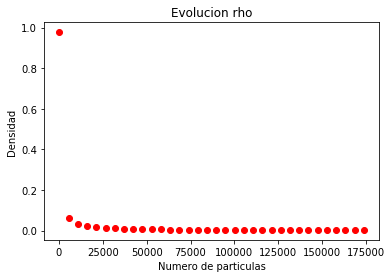

In [65]:
graficador(vector_n1,salida1[0],"Evolucion rho","Numero de particulas","Densidad",False)

### Prueba 2

In [82]:
# configuracion [+β,-µ,-λ,+γ]
configuracion_inicial1 = [15,-0.05,-0.3,50]

vector_v2 = np.arange(2500,3000,50) # inicio, fin, paso
print ("V:",vector_v2)
print("")
vector_n2 = generador_n(vector_v2,350) # cte = 350
print ("N:",vector_n2)

V: [2500 2550 2600 2650 2700 2750 2800 2850 2900 2950]

N: [875000, 892500, 910000, 927500, 945000, 962500, 980000, 997500, 1015000, 1032500]


In [85]:
start_time = time.time() #Para medir el tiempo de ejecución
salida2 = metodo2(configuracion_inicial1,vector_v2,vector_n2)
print ("Tiempo ejecución: ",time.time() - start_time,"seg")

Valor ro:  0.00270000001443
Valor ro:  0.00269607844279
Valor ro:  0.00269230770133
Valor ro:  0.00268867925242
Valor ro:  0.00268518519082
Valor ro:  0.00268181818628
Valor ro:  0.00267857143209
Valor ro:  0.00267543859927
Valor ro:  0.0026724137953
Valor ro:  0.00266949152716
Valor validador:  0.0025
Tiempo ejecución:  39.62257480621338 seg


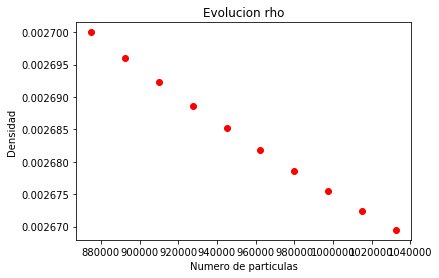

In [40]:
graficador(vector_n2,salida2[0],"Evolucion rho","Numero de particulas","Densidad",False)

### Prueba 3

In [86]:
# configuracion [+β,-µ,-λ,+γ]
configuracion_inicial1 = [15,-0.05,-0.3,50]

vector_v3 = np.arange(10000,15000,1500) # inicio, fin, paso
print ("V:",vector_v3)
print("")
vector_n3 = generador_n(vector_v3,350) # cte = 350
print ("N:",vector_n3)

V: [10000 11500 13000 14500]

N: [3500000, 4025000, 4550000, 5075000]


In [87]:
start_time = time.time() #Para medir el tiempo de ejecución
salida3 = metodo2(configuracion_inicial1,vector_v3,vector_n3)
print ("Tiempo ejecución: ",time.time() - start_time,"seg")

Valor ro:  0.00255
Valor ro:  0.00254347826087
Valor ro:  0.00253846153846
Valor ro:  0.00253448275862
Valor validador:  0.0025
Tiempo ejecución:  70.54571056365967 seg


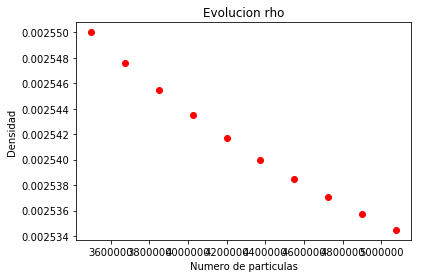

In [43]:
graficador(vector_n3,salida3[0],"Evolucion rho","Numero de particulas","Densidad",False)

### Prueba 4

In [62]:
# configuracion [+β,-µ,-λ,+γ]
configuracion_inicial1 = [15,-0.05,-0.3,50]

vector_v4 = np.arange(100000,200000,30000) # inicio, fin, paso
print ("V:",vector_v4)
print("")
vector_n4 = generador_n(vector_v4,350) # cte = 350
print ("N:",vector_n4)

V: [100000 130000 160000 190000]

N: [35000000, 45500000, 56000000, 66500000]


In [64]:
start_time = time.time() #Para medir el tiempo de ejecución
salida4 = metodo2(configuracion_inicial1,vector_v4,vector_n4)
print ("Tiempo ejecución: ",time.time() - start_time,"seg")

Valor ro:  0.002505
Valor ro:  0.00250384615385
Desbordamiento
Desbordamiento
Valor ro:  inf
Desbordamiento
Desbordamiento
Valor ro:  inf
Valor validador:  0.0025
Tiempo ejecución:  332.9321768283844 seg


### Sin gráfico

### Prueba 5

In [68]:
# configuracion [+β,-µ,-λ,+γ]
configuracion_inicial1 = [15,-0.05,-0.3,50]

vector_v5 = np.arange(100000,125000,5000) # inicio, fin, paso
print ("V:",vector_v5)
print("")
vector_n5 = generador_n(vector_v5,350) # cte = 350
print ("N:",vector_n5)

V: [100000 105000 110000 115000 120000]

N: [35000000, 36750000, 38500000, 40250000, 42000000]


In [69]:
start_time = time.time() #Para medir el tiempo de ejecución
salida5 = metodo2(configuracion_inicial1,vector_v5,vector_n5)
print ("Tiempo ejecución: ",time.time() - start_time,"seg")

Valor ro:  0.002505
Valor ro:  0.00250476190476
Valor ro:  0.00250454545455
Valor ro:  0.00250434782609
Valor ro:  0.00250416666667
Valor validador:  0.0025
Tiempo ejecución:  792.8227372169495 seg


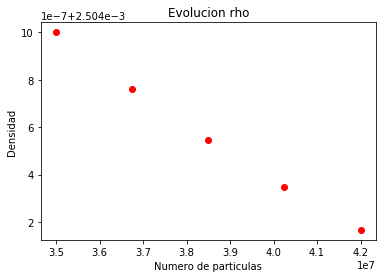

In [70]:
graficador(vector_n5,salida5[0],"Evolucion rho","Numero de particulas","Densidad",False)

<a id='E_seccion2'></a>
## Seccion 2: Prueba condicion de borde, N o V variable y los demás valores fijos

### Valores fijos:  β = 15   µ = -0.05    λ  = -0.3    γ = 50   cte = 350

### Prueba 1

In [117]:
# configuracion [+β,-µ,-λ,+γ]
cfg1 = [15,-0.05,-0.3,50]

v6_ = [155000] 
v6 = v6_[0]
n6_ = generador_n(v6_,350) # cte = 350
n6 = n6_[0]
print ("N:",n6)

N: 54250000


In [118]:
start_time = time.time() #Para medir el tiempo de ejecución
metodo1(cfg1[0],cfg1[1],cfg1[2],cfg1[3],v6,n6)
print ("Tiempo ejecución: ",time.time() - start_time,"seg")

Desbordamiento
Desbordamiento
Valor ro:  nan
Valor validador:  0.0025
Tiempo ejecución:  0.0015001296997070312 seg


### Prueba 2

In [90]:
# configuracion [+β,-µ,-λ,+γ]
cfg1 = [15,-0.05,-0.3,50]

v7_ = [150000] 
v7 = v7_[0]
n7_ = generador_n(v7_,350) # cte = 350
n7 = n7_[0]
print ("N:",n7)

N: 52500000


In [92]:
start_time = time.time() #Para medir el tiempo de ejecución
metodo1(cfg1[0],cfg1[1],cfg1[2],cfg1[3],v7,n7)
print ("Tiempo ejecución: ",time.time() - start_time,"seg")

Valor ro:  inf
Valor validador:  0.0025
Valor real:  inf
Valor esperado:  0.0025
Tiempo ejecución:  85.6496114730835 seg


### Prueba 3

In [97]:
# configuracion [+β,-µ,-λ,+γ]
cfg1 = [15,-0.05,-0.3,50]

v8_ = [145000] 
v8 = v8_[0]
n8_ = generador_n(v8_,350) # cte = 350
n8 = n8_[0]
print ("N:",n8)

N: 50750000


In [98]:
start_time = time.time() #Para medir el tiempo de ejecución
metodo1(cfg1[0],cfg1[1],cfg1[2],cfg1[3],v8,n8)
print ("Tiempo ejecución: ",time.time() - start_time,"seg")

Valor ro:  0.002503448275862068
Valor validador:  0.0025
Valor real:  0.002503448275862068
Valor esperado:  0.0025
Tiempo ejecución:  83.17478919029236 seg


### Prueba 4

In [99]:
# configuracion [+β,-µ,-λ,+γ]
cfg1 = [15,-0.05,-0.3,50]

v9_ = [148555] 
v9 = v9_[0]
n9_ = generador_n(v9_,350) # cte = 350
n9 = n9_[0]
print ("N:",n9)

N: 51994250


In [100]:
start_time = time.time() #Para medir el tiempo de ejecución
metodo1(cfg1[0],cfg1[1],cfg1[2],cfg1[3],v9,n9)
print ("Tiempo ejecución: ",time.time() - start_time,"seg")

Valor ro:  0.0025033657567904155
Valor validador:  0.0025
Valor real:  0.0025033657567904155
Valor esperado:  0.0025
Tiempo ejecución:  84.83085703849792 seg


### Prueba 5

In [101]:
# configuracion [+β,-µ,-λ,+γ]
cfg1 = [15,-0.05,-0.3,50]

v10_ = [149555] 
v10 = v10_[0]
n10_ = generador_n(v10_,350) # cte = 350
n10 = n10_[0]
print ("N:",n10)

N: 52344250


In [102]:
start_time = time.time() #Para medir el tiempo de ejecución
metodo1(cfg1[0],cfg1[1],cfg1[2],cfg1[3],v10,n10)
print ("Tiempo ejecución: ",time.time() - start_time,"seg")

Valor ro:  inf
Valor validador:  0.0025
Valor real:  inf
Valor esperado:  0.0025
Tiempo ejecución:  86.34644079208374 seg


### Prueba 6

In [103]:
# configuracion [+β,-µ,-λ,+γ]
cfg1 = [15,-0.05,-0.3,50]

v11_ = [149000] 
v11 = v11_[0]
n11_ = generador_n(v11_,350) # cte = 350
n11 = n11_[0]
print ("N:",n11)

N: 52150000


In [104]:
start_time = time.time() #Para medir el tiempo de ejecución
metodo1(cfg1[0],cfg1[1],cfg1[2],cfg1[3],v11,n11)
print ("Tiempo ejecución: ",time.time() - start_time,"seg")

Valor ro:  0.0025033557046979867
Valor validador:  0.0025
Valor real:  0.0025033557046979867
Valor esperado:  0.0025
Tiempo ejecución:  84.91440749168396 seg


### Prueba 7

In [45]:
# configuracion [+β,-µ,-λ,+γ]
cfg1 = [15,-0.05,-0.3,50]

v12_ = [149070] 
v12 = v12_[0]
n12_ = generador_n(v12_,350) # cte = 350
n12 = n12_[0]
print ("N:",n12)

N: 52174500


In [46]:
start_time = time.time() #Para medir el tiempo de ejecución
metodo1(cfg1[0],cfg1[1],cfg1[2],cfg1[3],v12,n12)
print ("Tiempo ejecución: ",time.time() - start_time,"seg")

Valor ro:  0.002503354128932717
Valor validador:  0.0025
Valor real:  0.002503354128932717
Valor esperado:  0.0025
Tiempo ejecución:  86.61444568634033 seg


### Prueba 8

In [47]:
# configuracion [+β,-µ,-λ,+γ]
cfg1 = [15,-0.05,-0.3,50]

v13_ = [149071] 
v13 = v13_[0]
n13_ = generador_n(v13_,350) # cte = 350
n13 = n13_[0]
print ("N:",n13)

N: 52174850


In [48]:
start_time = time.time() #Para medir el tiempo de ejecución
metodo1(cfg1[0],cfg1[1],cfg1[2],cfg1[3],v13,n13)
print ("Tiempo ejecución: ",time.time() - start_time,"seg")

Valor ro:  inf
Valor validador:  0.0025
Valor real:  inf
Valor esperado:  0.0025
Tiempo ejecución:  86.41235828399658 seg


### Prueba 9

In [60]:
# configuracion [+β,-µ,-λ,+γ]
cfg1 = [15,-0.05,-0.3,50]

n14_ = [52174849] 
n14 = n14_[0]
v14_ = generador_v(n14_,350) # cte = 350
v14 = v14_[0]
print ("V:",v14)

V: 149070


In [61]:
start_time = time.time() #Para medir el tiempo de ejecución
metodo1(cfg1[0],cfg1[1],cfg1[2],cfg1[3],v14,n14)
print ("Tiempo ejecución: ",time.time() - start_time,"seg")

Valor ro:  0.002503354128932717
Valor validador:  0.0025
Valor real:  0.002503354128932717
Valor esperado:  0.0025
Tiempo ejecución:  87.69315123558044 seg


### Prueba 10

In [65]:
# configuracion [+β,-µ,-λ,+γ]
cfg1 = [15,-0.05,-0.3,50]

n15_ = [52174850] 
n15 = n15_[0]
v15_ = generador_v(n15_,350) # cte = 350
v15 = v15_[0]
print ("V:",v15)

V: 149071


In [66]:
start_time = time.time() #Para medir el tiempo de ejecución
metodo1(cfg1[0],cfg1[1],cfg1[2],cfg1[3],v15,n15)
print ("Tiempo ejecución: ",time.time() - start_time,"seg")

Valor ro:  inf
Valor validador:  0.0025
Valor real:  inf
Valor esperado:  0.0025
Tiempo ejecución:  87.1510181427002 seg


<a id='E_seccion3'></a>
## Seccion 3: Datos fijos y uno variable (vector) 

### subseccion : Prueba β

In [111]:
# configuracion [-µ,-λ,+γ,V,N]  cte = 512
vf1 = [-0.05,-0.3,50,5000,2560000]

#### Prueba 1

In [114]:
beta1 = np.arange(15,40,5)
beta1

array([15, 20, 25, 30, 35])

In [119]:
start_time = time.time() #Para medir el tiempo de ejecución
metodo3_beta(beta1,vf1[0],vf1[1],vf1[2],vf1[3],vf1[4])
print ("Tiempo ejecución: ",time.time() - start_time,"seg")

Beta:  15  Mu: -0.05  Lambda:  -0.3  Gamma:  50  Volumen:  5000  Particulas:  2560000
Valor ro:  0.002600000000000105
Valor validador:  0.0025
 
 
Beta:  20  Mu: -0.05  Lambda:  -0.3  Gamma:  50  Volumen:  5000  Particulas:  2560000
Valor ro:  0.0026
Valor validador:  0.0025
 
 
Beta:  25  Mu: -0.05  Lambda:  -0.3  Gamma:  50  Volumen:  5000  Particulas:  2560000
Valor ro:  0.0026
Valor validador:  0.0025
 
 
Beta:  30  Mu: -0.05  Lambda:  -0.3  Gamma:  50  Volumen:  5000  Particulas:  2560000
Valor ro:  0.0026000000000000003
Valor validador:  0.0025
 
 
Beta:  35  Mu: -0.05  Lambda:  -0.3  Gamma:  50  Volumen:  5000  Particulas:  2560000
Valor ro:  0.0026000000000000016
Valor validador:  0.0025
 
 
Tiempo ejecución:  57.62278485298157 seg


#### Prueba 2

In [146]:
beta2 = np.arange(500,800,100)
beta2

array([500, 600, 700])

In [147]:
start_time = time.time() #Para medir el tiempo de ejecución
metodo3_beta(beta2,vf1[0],vf1[1],vf1[2],vf1[3],vf1[4])
print ("Tiempo ejecución: ",time.time() - start_time,"seg")

Beta:  500  Mu: -0.05  Lambda:  -0.3  Gamma:  50  Volumen:  5000  Particulas:  2560000
Desbordamiento
Desbordamiento
Valor ro:  0.0014
Valor validador:  0.0025
 
 
Beta:  600  Mu: -0.05  Lambda:  -0.3  Gamma:  50  Volumen:  5000  Particulas:  2560000
Desbordamiento
Desbordamiento
Valor ro:  0.0010000000000000002
Valor validador:  0.0025
 
 
Beta:  700  Mu: -0.05  Lambda:  -0.3  Gamma:  50  Volumen:  5000  Particulas:  2560000
Desbordamiento
Desbordamiento
Valor ro:  0.0008
Valor validador:  0.0025
 
 
Tiempo ejecución:  0.0020020008087158203 seg


#### Prueba 3

In [156]:
beta3 = np.arange(300,450,25)
beta3

array([300, 325, 350, 375, 400, 425])

In [157]:
start_time = time.time() #Para medir el tiempo de ejecución
metodo3_beta(beta3,vf1[0],vf1[1],vf1[2],vf1[3],vf1[4])
print ("Tiempo ejecución: ",time.time() - start_time,"seg")

Beta:  300  Mu: -0.05  Lambda:  -0.3  Gamma:  50  Volumen:  5000  Particulas:  2560000
Valor ro:  0.0026000000000000003
Valor validador:  0.0025
 
 
Beta:  325  Mu: -0.05  Lambda:  -0.3  Gamma:  50  Volumen:  5000  Particulas:  2560000
Valor ro:  0.0026
Valor validador:  0.0025
 
 
Beta:  350  Mu: -0.05  Lambda:  -0.3  Gamma:  50  Volumen:  5000  Particulas:  2560000
Valor ro:  0.0026000000000000003
Valor validador:  0.0025
 
 
Beta:  375  Mu: -0.05  Lambda:  -0.3  Gamma:  50  Volumen:  5000  Particulas:  2560000
Valor ro:  0.0026000000000000003
Valor validador:  0.0025
 
 
Beta:  400  Mu: -0.05  Lambda:  -0.3  Gamma:  50  Volumen:  5000  Particulas:  2560000
Valor ro:  0.0026000000000000003
Valor validador:  0.0025
 
 
Beta:  425  Mu: -0.05  Lambda:  -0.3  Gamma:  50  Volumen:  5000  Particulas:  2560000
Desbordamiento
Desbordamiento
Valor ro:  0.0021999999998818945
Valor validador:  0.0025
 
 
Tiempo ejecución:  61.38517761230469 seg


### subseccion : Prueba µ

In [56]:
# configuracion [+β,-λ,+γ,V,N]  cte = 512
vf2 = [15,-0.3,50,5000,2560000]

#### Prueba 1

In [43]:
mu1 = np.arange(-0.001,-0.01,-0.001)
mu1

array([-0.001, -0.002, -0.003, -0.004, -0.005, -0.006, -0.007, -0.008,
       -0.009])

In [44]:
start_time = time.time() #Para medir el tiempo de ejecución
metodo3_mu(vf2[0],mu1,vf2[1],vf2[2],vf2[3],vf2[4])
print ("Tiempo ejecución: ",time.time() - start_time,"seg")

Beta:  15  Mu: -0.001  Lambda:  -0.3  Gamma:  50  Volumen:  5000  Particulas:  2560000
Valor ro:  0.00309
Valor validador:  0.00299
 
 
Beta:  15  Mu: -0.002  Lambda:  -0.3  Gamma:  50  Volumen:  5000  Particulas:  2560000
Valor ro:  0.003079999999999999
Valor validador:  0.00298
 
 
Beta:  15  Mu: -0.003  Lambda:  -0.3  Gamma:  50  Volumen:  5000  Particulas:  2560000
Valor ro:  0.003069999999999999
Valor validador:  0.00297
 
 
Beta:  15  Mu: -0.004  Lambda:  -0.3  Gamma:  50  Volumen:  5000  Particulas:  2560000
Valor ro:  0.0030600000000000002
Valor validador:  0.00296
 
 
Beta:  15  Mu: -0.005  Lambda:  -0.3  Gamma:  50  Volumen:  5000  Particulas:  2560000
Valor ro:  0.0030499999999999993
Valor validador:  0.00295
 
 
Beta:  15  Mu: -0.006  Lambda:  -0.3  Gamma:  50  Volumen:  5000  Particulas:  2560000
Valor ro:  0.0030399999999999997
Valor validador:  0.00294
 
 
Beta:  15  Mu: -0.007  Lambda:  -0.3  Gamma:  50  Volumen:  5000  Particulas:  2560000
Valor ro:  0.0030299999999999

#### Prueba 2

In [45]:
mu2 = np.arange(-0.02,-0.1,-0.01)
mu2

array([-0.02, -0.03, -0.04, -0.05, -0.06, -0.07, -0.08, -0.09])

In [46]:
start_time = time.time() #Para medir el tiempo de ejecución
metodo3_mu(vf2[0],mu2,vf2[1],vf2[2],vf2[3],vf2[4])
print ("Tiempo ejecución: ",time.time() - start_time,"seg")

Beta:  15  Mu: -0.02  Lambda:  -0.3  Gamma:  50  Volumen:  5000  Particulas:  2560000
Valor ro:  0.0029000000000000015
Valor validador:  0.0028
 
 
Beta:  15  Mu: -0.03  Lambda:  -0.3  Gamma:  50  Volumen:  5000  Particulas:  2560000
Valor ro:  0.0028000000000000017
Valor validador:  0.0027
 
 
Beta:  15  Mu: -0.04  Lambda:  -0.3  Gamma:  50  Volumen:  5000  Particulas:  2560000
Valor ro:  0.0027000000000000127
Valor validador:  0.0026
 
 
Beta:  15  Mu: -0.05  Lambda:  -0.3  Gamma:  50  Volumen:  5000  Particulas:  2560000
Valor ro:  0.002600000000000105
Valor validador:  0.0025
 
 
Beta:  15  Mu: -0.06  Lambda:  -0.3  Gamma:  50  Volumen:  5000  Particulas:  2560000
Valor ro:  0.002500000000000804
Valor validador:  0.0024
 
 
Beta:  15  Mu: -0.07  Lambda:  -0.3  Gamma:  50  Volumen:  5000  Particulas:  2560000
Valor ro:  0.0024000000000056654
Valor validador:  0.0023
 
 
Beta:  15  Mu: -0.08  Lambda:  -0.3  Gamma:  50  Volumen:  5000  Particulas:  2560000
Valor ro:  0.002300000000036

#### Prueba 3

In [53]:
mu3 = np.arange(-0.1,-0.29,-0.03)
mu3

array([-0.1 , -0.13, -0.16, -0.19, -0.22, -0.25, -0.28])

In [55]:
start_time = time.time() #Para medir el tiempo de ejecución
metodo3_mu(vf2[0],mu3,vf2[1],vf2[2],vf2[3],vf2[4])
print ("Tiempo ejecución: ",time.time() - start_time,"seg")

Beta:  15  Mu: -0.1  Lambda:  -0.3  Gamma:  50  Volumen:  5000  Particulas:  2560000
Valor ro:  0.0021000000012556556
Valor validador:  0.002
 
 
Beta:  15  Mu: -0.13  Lambda:  -0.3  Gamma:  50  Volumen:  5000  Particulas:  2560000
Valor ro:  0.0018000001402107156
Valor validador:  0.0017
 
 
Beta:  15  Mu: -0.16  Lambda:  -0.3  Gamma:  50  Volumen:  5000  Particulas:  2560000
Valor ro:  0.001500007878518331
Valor validador:  0.0014
 
 
Beta:  15  Mu: -0.19  Lambda:  -0.3  Gamma:  50  Volumen:  5000  Particulas:  2560000
Valor ro:  0.0012002225117618785
Valor validador:  0.0011
 
 
Beta:  15  Mu: -0.22  Lambda:  -0.3  Gamma:  50  Volumen:  5000  Particulas:  2560000
Valor ro:  0.0009031619639076767
Valor validador:  0.0008
 
 
Beta:  15  Mu: -0.25  Lambda:  -0.3  Gamma:  50  Volumen:  5000  Particulas:  2560000
Valor ro:  0.0006230043613911649
Valor validador:  0.0005
 
 
Beta:  15  Mu: -0.28  Lambda:  -0.3  Gamma:  50  Volumen:  5000  Particulas:  2560000
Valor ro:  0.0003920164474349

### subseccion : Prueba λ

In [62]:
# configuracion [+β,-µ,+γ,V,N] cte = 512
vf3 = [15,-0.05,50,5000,2560000]

#### Prueba 1

In [79]:
lp1 = np.arange(-100,-1000,-100)
lamdda1 = lp1[::-1] # Invertir vector
lamdda1

array([-900, -800, -700, -600, -500, -400, -300, -200, -100])

In [80]:
start_time = time.time() #Para medir el tiempo de ejecución
metodo3_lambda(vf3[0],vf3[1],lamdda1,vf3[2],vf3[3],vf3[4])
print ("Tiempo ejecución: ",time.time() - start_time,"seg")

Beta:  15  Mu: -0.05  Lambda:  -900  Gamma:  50  Volumen:  5000  Particulas:  2560000
Desbordamiento
Desbordamiento
Valor ro:  0.0
Valor validador:  8.9995
 
 
Beta:  15  Mu: -0.05  Lambda:  -800  Gamma:  50  Volumen:  5000  Particulas:  2560000
Desbordamiento
Desbordamiento
Valor ro:  0.0
Valor validador:  7.9995
 
 
Beta:  15  Mu: -0.05  Lambda:  -700  Gamma:  50  Volumen:  5000  Particulas:  2560000
Desbordamiento
Desbordamiento
Valor ro:  0.0
Valor validador:  6.9995
 
 
Beta:  15  Mu: -0.05  Lambda:  -600  Gamma:  50  Volumen:  5000  Particulas:  2560000
Desbordamiento
Desbordamiento
Valor ro:  0.0
Valor validador:  5.9995
 
 
Beta:  15  Mu: -0.05  Lambda:  -500  Gamma:  50  Volumen:  5000  Particulas:  2560000
Desbordamiento
Desbordamiento
Valor ro:  0.0
Valor validador:  4.9995
 
 
Beta:  15  Mu: -0.05  Lambda:  -400  Gamma:  50  Volumen:  5000  Particulas:  2560000
Desbordamiento
Desbordamiento
Valor ro:  0.0
Valor validador:  3.9995
 
 
Beta:  15  Mu: -0.05  Lambda:  -300  Gam

#### Prueba 2

In [81]:
lp2= np.arange(-10,-100,-15)
lamdda2 = lp2[::-1] # Invertir vector
lamdda2

array([-85, -70, -55, -40, -25, -10])

In [82]:
start_time = time.time() #Para medir el tiempo de ejecución
metodo3_lambda(vf3[0],vf3[1],lamdda2,vf3[2],vf3[3],vf3[4])
print ("Tiempo ejecución: ",time.time() - start_time,"seg")

Beta:  15  Mu: -0.05  Lambda:  -85  Gamma:  50  Volumen:  5000  Particulas:  2560000
Desbordamiento
Desbordamiento
Valor ro:  0.0
Valor validador:  0.8495
 
 
Beta:  15  Mu: -0.05  Lambda:  -70  Gamma:  50  Volumen:  5000  Particulas:  2560000
Desbordamiento
Desbordamiento
Valor ro:  0.0
Valor validador:  0.6995
 
 
Beta:  15  Mu: -0.05  Lambda:  -55  Gamma:  50  Volumen:  5000  Particulas:  2560000
Desbordamiento
Desbordamiento
Valor ro:  0.0
Valor validador:  0.5495
 
 
Beta:  15  Mu: -0.05  Lambda:  -40  Gamma:  50  Volumen:  5000  Particulas:  2560000
Desbordamiento
Desbordamiento
Valor ro:  0.0002
Valor validador:  0.3995
 
 
Beta:  15  Mu: -0.05  Lambda:  -25  Gamma:  50  Volumen:  5000  Particulas:  2560000
Desbordamiento
Desbordamiento
Valor ro:  0.0002
Valor validador:  0.2495
 
 
Beta:  15  Mu: -0.05  Lambda:  -10  Gamma:  50  Volumen:  5000  Particulas:  2560000
Desbordamiento
Desbordamiento
Valor ro:  0.0008
Valor validador:  0.0995
 
 
Tiempo ejecución:  0.0035018920898437

#### Prueba 3

In [85]:
lp3 = np.arange(-0.1,-10,-0.7)
lamdda3 = lp3[::-1] # Invertir vector
lamdda3

array([-9.9, -9.2, -8.5, -7.8, -7.1, -6.4, -5.7, -5. , -4.3, -3.6, -2.9,
       -2.2, -1.5, -0.8, -0.1])

In [84]:
start_time = time.time() #Para medir el tiempo de ejecución
metodo3_lambda(vf3[0],vf3[1],lamdda3,vf3[2],vf3[3],vf3[4])
print ("Tiempo ejecución: ",time.time() - start_time,"seg")

Beta:  15  Mu: -0.05  Lambda:  -9.9  Gamma:  50  Volumen:  5000  Particulas:  2560000
Desbordamiento
Desbordamiento
Valor ro:  0.0008
Valor validador:  0.0985
 
 
Beta:  15  Mu: -0.05  Lambda:  -9.2  Gamma:  50  Volumen:  5000  Particulas:  2560000
Desbordamiento
Desbordamiento
Valor ro:  0.001
Valor validador:  0.0915
 
 
Beta:  15  Mu: -0.05  Lambda:  -8.5  Gamma:  50  Volumen:  5000  Particulas:  2560000
Desbordamiento
Desbordamiento
Valor ro:  0.001
Valor validador:  0.0845
 
 
Beta:  15  Mu: -0.05  Lambda:  -7.8  Gamma:  50  Volumen:  5000  Particulas:  2560000
Desbordamiento
Desbordamiento
Valor ro:  0.0012000000000000001
Valor validador:  0.0775
 
 
Beta:  15  Mu: -0.05  Lambda:  -7.1  Gamma:  50  Volumen:  5000  Particulas:  2560000
Desbordamiento
Desbordamiento
Valor ro:  0.0012000000000000001
Valor validador:  0.0705
 
 
Beta:  15  Mu: -0.05  Lambda:  -6.4  Gamma:  50  Volumen:  5000  Particulas:  2560000
Desbordamiento
Desbordamiento
Valor ro:  0.0014
Valor validador:  0.063

### subseccion : Prueba γ

In [63]:
# configuracion [+β,-µ,-λ,V,N] cte = 512
vf4 = [15,-0.05,-0.3,5000,2560000]

#### Prueba 1

In [78]:
gamma1 = np.arange(25,50,5)
gamma1

array([25, 30, 35, 40, 45])

In [86]:
start_time = time.time() #Para medir el tiempo de ejecución
metodo3_gamma(vf4[0],vf4[1],vf4[2],gamma1,vf4[3],vf4[4])
print ("Tiempo ejecución: ",time.time() - start_time,"seg")

Beta:  15  Mu: -0.05  Lambda:  -0.3  Gamma:  25  Volumen:  5000  Particulas:  2560000
Valor ro:  0.005100000000000002
Valor validador:  0.005
 
 
Beta:  15  Mu: -0.05  Lambda:  -0.3  Gamma:  30  Volumen:  5000  Particulas:  2560000
Valor ro:  0.004266666666666667
Valor validador:  0.00416666666667
 
 
Beta:  15  Mu: -0.05  Lambda:  -0.3  Gamma:  35  Volumen:  5000  Particulas:  2560000
Valor ro:  0.0036714285714285724
Valor validador:  0.00357142857143
 
 
Beta:  15  Mu: -0.05  Lambda:  -0.3  Gamma:  40  Volumen:  5000  Particulas:  2560000
Valor ro:  0.003225
Valor validador:  0.003125
 
 
Beta:  15  Mu: -0.05  Lambda:  -0.3  Gamma:  45  Volumen:  5000  Particulas:  2560000
Valor ro:  0.0028777777777777886
Valor validador:  0.00277777777778
 
 
Tiempo ejecución:  51.73904061317444 seg


#### Prueba 2

In [66]:
gamma2 = np.arange(500,1000,150)
gamma2

array([500, 650, 800, 950])

In [87]:
start_time = time.time() #Para medir el tiempo de ejecución
metodo3_gamma(vf4[0],vf4[1],vf4[2],gamma2,vf4[3],vf4[4])
print ("Tiempo ejecución: ",time.time() - start_time,"seg")

Beta:  15  Mu: -0.05  Lambda:  -0.3  Gamma:  500  Volumen:  5000  Particulas:  2560000
Valor ro:  0.0003511674994587007
Valor validador:  0.00025
 
 
Beta:  15  Mu: -0.05  Lambda:  -0.3  Gamma:  650  Volumen:  5000  Particulas:  2560000
Valor ro:  0.00029132109408965717
Valor validador:  0.000192307692308
 
 
Beta:  15  Mu: -0.05  Lambda:  -0.3  Gamma:  800  Volumen:  5000  Particulas:  2560000
Valor ro:  0.00024779111159188366
Valor validador:  0.00015625
 
 
Beta:  15  Mu: -0.05  Lambda:  -0.3  Gamma:  950  Volumen:  5000  Particulas:  2560000
Valor ro:  0.00022039555860837293
Valor validador:  0.000131578947368
 
 
Tiempo ejecución:  40.58755159378052 seg


#### Prueba 3

In [69]:
gamma3 = np.arange(1000,10000,1250)
gamma3

array([1000, 2250, 3500, 4750, 6000, 7250, 8500, 9750])

In [88]:
start_time = time.time() #Para medir el tiempo de ejecución
metodo3_gamma(vf4[0],vf4[1],vf4[2],gamma3,vf4[3],vf4[4])
print ("Tiempo ejecución: ",time.time() - start_time,"seg")

Beta:  15  Mu: -0.05  Lambda:  -0.3  Gamma:  1000  Volumen:  5000  Particulas:  2560000
Valor ro:  0.0002145156030537105
Valor validador:  0.000125
 
 
Beta:  15  Mu: -0.05  Lambda:  -0.3  Gamma:  2250  Volumen:  5000  Particulas:  2560000
Valor ro:  0.00019541617813164977
Valor validador:  5.55555555556e-05
 
 
Beta:  15  Mu: -0.05  Lambda:  -0.3  Gamma:  3500  Volumen:  5000  Particulas:  2560000
Valor ro:  0.00019540453246296368
Valor validador:  3.57142857143e-05
 
 
Beta:  15  Mu: -0.05  Lambda:  -0.3  Gamma:  4750  Volumen:  5000  Particulas:  2560000
Valor ro:  0.0001954045260215595
Valor validador:  2.63157894737e-05
 
 
Beta:  15  Mu: -0.05  Lambda:  -0.3  Gamma:  6000  Volumen:  5000  Particulas:  2560000
Valor ro:  0.00019540452601799686
Valor validador:  2.08333333333e-05
 
 
Beta:  15  Mu: -0.05  Lambda:  -0.3  Gamma:  7250  Volumen:  5000  Particulas:  2560000
Valor ro:  0.00019540452601799488
Valor validador:  1.72413793103e-05
 
 
Beta:  15  Mu: -0.05  Lambda:  -0.3  Ga

<a id='E_seccion4'></a>
## Seccion 4: Graficos 3D de validador, con un dato fijo, los demás variables

## *__ Estamos trabajando para usted__*

### subseccion : Prueba ρ

### subseccion : Prueba µ

### subseccion : Prueba λ

### subseccion : Prueba γ

## *Pruebas de modulos y otros*

In [74]:
vect_n = [100, 250, 380, 490, 550]
nv = generador_v(vect_n, 0.5)

vect_v = [70, 84, 96, 102, 158]
nn = generador_n(vect_v, 500)

print("N: ",vect_n)
print("V: ",nv)
print()
print("V: ",vect_v)
print("N: ",nn)

N:  [100, 250, 380, 490, 550]
V:  [200.0, 500.0, 760.0, 980.0, 1100.0]

V:  [70, 84, 96, 102, 158]
N:  [35000, 42000, 48000, 51000, 79000]


In [52]:
a = np.random.randint(5,500,5)
print (a)
np.random.shuffle(a)
print (a)

[  7 105  34 410 426]
[410 426  34   7 105]


In [67]:
test = 5

test
test
test

5

In [68]:
print(test)
print(test)
print(test)

5
5
5


In [69]:
10/3

3.3333333333333335

In [70]:
10//3

3

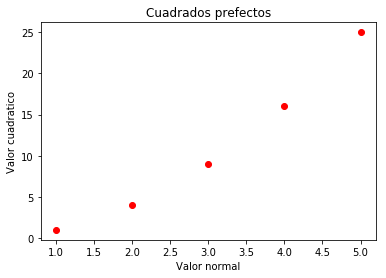

In [55]:
#Prueba de graficador
graficador([1,2,3,4,5],[1,4,9,16,25],"Cuadrados prefectos","Valor normal","Valor cuadratico",False)

In [56]:
math.log(sys.float_info.max)

709.782712893384

In [57]:
sys.float_info.max

1.7976931348623157e+308

In [58]:
math.exp(math.log(sys.float_info.max))

1.7976931348622732e+308

http://stackoverflow.com/questions/4050907/python-overflowerror-math-range-error

https://docs.python.org/3.6/library/math.html

In [59]:
time.gmtime(0)

time.struct_time(tm_year=1970, tm_mon=1, tm_mday=1, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=3, tm_yday=1, tm_isdst=0)

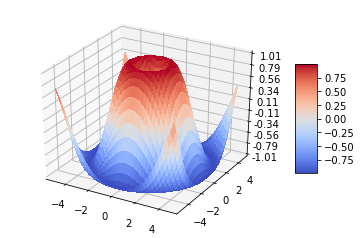

In [2]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

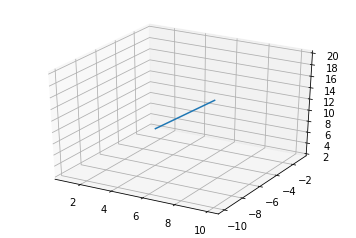

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
# X, Y, Z = axes3d.get_test_data(0.05)

X = [1,2,3,4,5,6,7,8,9,10]

Y = [-1,-2,-3,-4,-5,-6,-7,-8,-9,-10]

Z = [2,4,6,8,10,12,14,16,18,20]

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

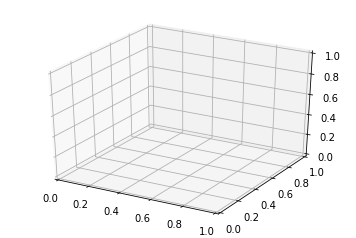

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plt.show()